In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

<ipython-input-16-1e11330187f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=glucose_stats, x="Group", y="Mean Glucose", ax=ax[0], palette=["#1f77b4", "#aec7e8"])
<ipython-input-16-1e11330187f3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=glucose_stats, x="Group", y="Max Glucose", ax=ax[1], palette=["#1f77b4", "#aec7e8"])


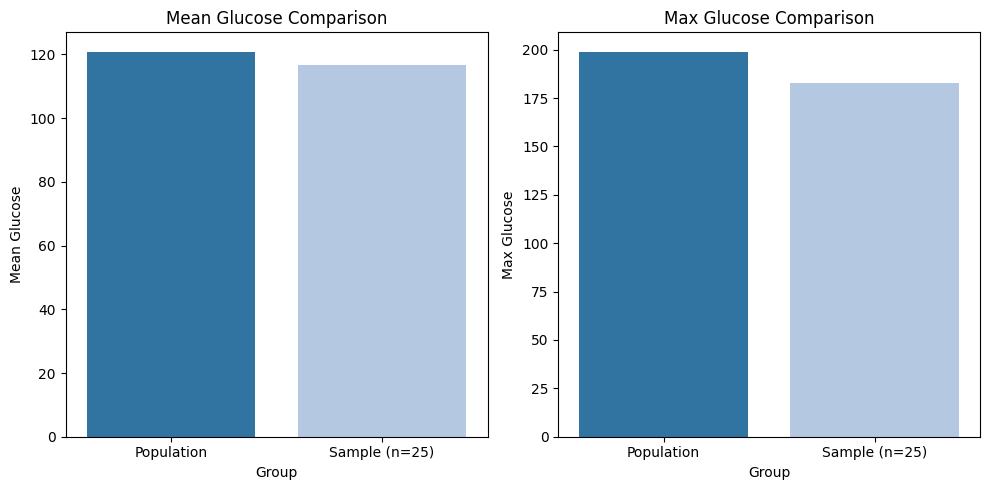

In [16]:
np.random.seed(42)
sample_Dataset = df.sample(n=25)

# Compute statistics for Glucose
glucose_stats = pd.DataFrame({
    "Group": ["Population", "Sample (n=25)"],
    "Mean Glucose": [df['Glucose'].mean(), sample_Dataset['Glucose'].mean()],
    "Max Glucose": [df['Glucose'].max(), sample_Dataset['Glucose'].max()]
})
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=glucose_stats, x="Group", y="Mean Glucose", ax=ax[0], palette=["#1f77b4", "#aec7e8"])
ax[0].set_title("Mean Glucose Comparison")
sns.barplot(data=glucose_stats, x="Group", y="Max Glucose", ax=ax[1], palette=["#1f77b4", "#aec7e8"])
ax[1].set_title("Max Glucose Comparison")
plt.tight_layout()
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts

<ipython-input-17-4f56e262f99c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bmi_percentiles, x="Group", y="98th Percentile BMI", palette=["#ff7f0e", "#ffbb78"])


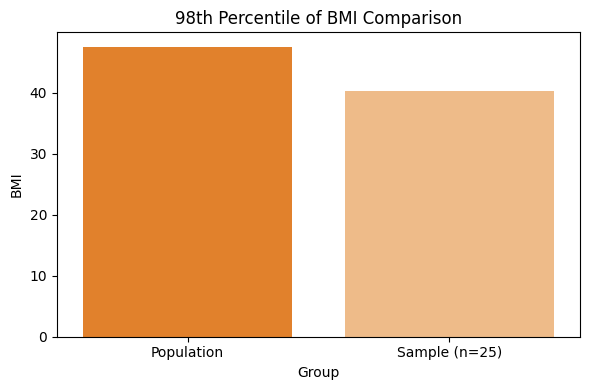

In [17]:
bmi_percentiles = pd.DataFrame({
    "Group": ["Population", "Sample (n=25)"],
    "98th Percentile BMI": [
        np.percentile(df['BMI'], 98),
        np.percentile(sample_Dataset['BMI'], 98)
    ]
})

# Plot BMI percentiles with new colors
plt.figure(figsize=(6, 4))
sns.barplot(data=bmi_percentiles, x="Group", y="98th Percentile BMI", palette=["#ff7f0e", "#ffbb78"])
plt.title("98th Percentile of BMI Comparison")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (1

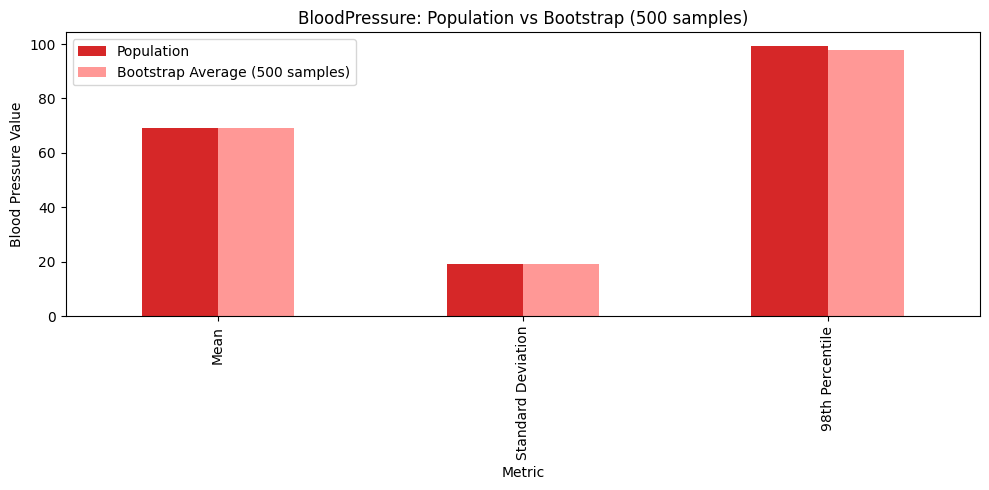

In [18]:
n_iterations = 500
sample_size = 150

# Lists to collect results
mean_bp, std_bp, p98_bp = [], [], []

np.random.seed(42)
for _ in range(n_iterations):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    mean_bp.append(sample.mean())
    std_bp.append(sample.std())
    p98_bp.append(np.percentile(sample, 98))

# Summary DataFrame
bp_comparison = pd.DataFrame({
    "Metric": ["Mean", "Standard Deviation", "98th Percentile"],
    "Population": [
        df['BloodPressure'].mean(),
        df['BloodPressure'].std(),
        np.percentile(df['BloodPressure'], 98)
    ],
    "Bootstrap Average (500 samples)": [
        np.mean(mean_bp),
        np.mean(std_bp),
        np.mean(p98_bp)
    ]
})

# Plot Bootstrap vs Population with custom colors
bp_comparison.set_index("Metric").plot(kind="bar", figsize=(10, 5), color=["#d62728", "#ff9896"])
plt.title("BloodPressure: Population vs Bootstrap (500 samples)")
plt.ylabel("Blood Pressure Value")
plt.tight_layout()
plt.show()